In [1]:
#Keras
from tensorflow import keras

# Import of keras model and hidden layers for CNN
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# data visualisation and manipulation
import matplotlib.pyplot as plt
from matplotlib import style

#Initialize a list of paths for images
imagepaths = []

import os
for dirname, _, filenames in os.walk(r'images\4.1'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

print(len(imagepaths))

1602


In [2]:
IMG_SIZE=128
X=[]
y=[]
for image in imagepaths:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        if(image.startswith('images\\4.1\\meme')):
            y.append('meme')
        else:
            y.append('non-meme')
    except:
        pass
    
len(X)

1602

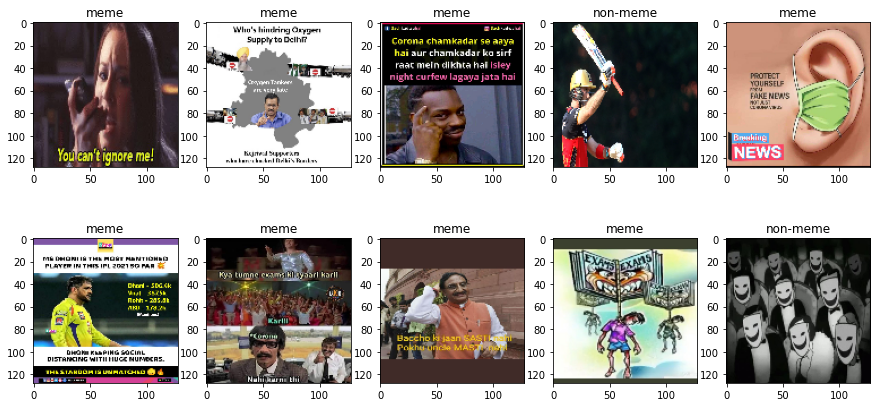

In [3]:
import random as rn
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

In [4]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [5]:
# Create a CNN Sequential Model
model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.6))

model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))

In [6]:
#Model configuration for training purpose
adam= keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [8]:
history=model.fit(x_train, y_train, epochs=50, batch_size=12, verbose=2, 
         validation_data=(x_test, y_test))

Epoch 1/50
101/101 - 142s - loss: 2.0565 - accuracy: 0.5404 - val_loss: 0.5912 - val_accuracy: 0.7606
Epoch 2/50
101/101 - 137s - loss: 0.5899 - accuracy: 0.6994 - val_loss: 0.5933 - val_accuracy: 0.6110
Epoch 3/50
101/101 - 134s - loss: 0.5476 - accuracy: 0.7302 - val_loss: 0.4646 - val_accuracy: 0.7731
Epoch 4/50
101/101 - 133s - loss: 0.4864 - accuracy: 0.8052 - val_loss: 0.4232 - val_accuracy: 0.8055
Epoch 5/50
101/101 - 134s - loss: 0.4762 - accuracy: 0.7893 - val_loss: 0.5065 - val_accuracy: 0.8030
Epoch 6/50
101/101 - 133s - loss: 0.4659 - accuracy: 0.8143 - val_loss: 0.4356 - val_accuracy: 0.8155
Epoch 7/50
101/101 - 134s - loss: 0.4295 - accuracy: 0.8335 - val_loss: 0.3549 - val_accuracy: 0.8728
Epoch 8/50
101/101 - 132s - loss: 0.4125 - accuracy: 0.8401 - val_loss: 0.3354 - val_accuracy: 0.8579
Epoch 9/50
101/101 - 134s - loss: 0.3490 - accuracy: 0.8468 - val_loss: 0.3815 - val_accuracy: 0.8329
Epoch 10/50
101/101 - 135s - loss: 0.4051 - accuracy: 0.8326 - val_loss: 0.3539 - 

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy: {:2.2f}%'.format(accuracy*100))


13/13 [==============================] - 2s 178ms/step - loss: 0.4088 - accuracy: 0.9027
Test accuracy: 90.27%


<AxesSubplot:>

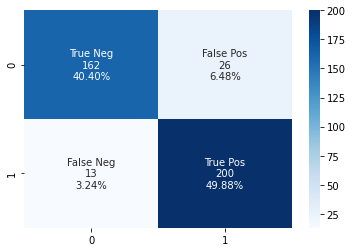

In [10]:
# Making predictions on test data
prediction = model.predict(x_test)
#Transform predictions into 1D array 
y_pred = np.argmax(prediction, axis=1)
y_test1=y_test.astype(int)
y_test2=[]
for i in y_test1:
    a=1
    #print(i[0],i[1])
    if(i[0]==1 and i[1]==0):
        a=0
    y_test2.append(a)
 
#Create a Confusion Matrix for Evaluation
cf_matrix = confusion_matrix(y_test2, y_pred)

import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       188
           1       0.88      0.94      0.91       213

    accuracy                           0.90       401
   macro avg       0.91      0.90      0.90       401
weighted avg       0.90      0.90      0.90       401



Epoch 1/50
121/121 - 35s - loss: 9.6607 - accuracy: 0.6634 - val_loss: 0.5603 - val_accuracy: 0.7453
Epoch 2/50
121/121 - 31s - loss: 0.5247 - accuracy: 0.7509 - val_loss: 0.5496 - val_accuracy: 0.7391
Epoch 3/50
121/121 - 31s - loss: 0.5211 - accuracy: 0.7550 - val_loss: 0.5084 - val_accuracy: 0.7826
Epoch 4/50
121/121 - 31s - loss: 0.4287 - accuracy: 0.8133 - val_loss: 0.5175 - val_accuracy: 0.7702
Epoch 5/50
121/121 - 31s - loss: 0.3455 - accuracy: 0.8598 - val_loss: 0.5396 - val_accuracy: 0.7453
Epoch 6/50
121/121 - 31s - loss: 0.2978 - accuracy: 0.8716 - val_loss: 0.7565 - val_accuracy: 0.7826
Epoch 7/50
121/121 - 31s - loss: 0.3952 - accuracy: 0.8425 - val_loss: 0.7355 - val_accuracy: 0.7640
Epoch 8/50
121/121 - 31s - loss: 0.2803 - accuracy: 0.8855 - val_loss: 0.5708 - val_accuracy: 0.7826
Epoch 9/50
121/121 - 31s - loss: 0.2318 - accuracy: 0.9091 - val_loss: 0.5401 - val_accuracy: 0.8012
Epoch 10/50
121/121 - 31s - loss: 0.2036 - accuracy: 0.9098 - val_loss: 0.5875 - val_accura

Epoch 31/50
107/107 - 28s - loss: 0.1136 - accuracy: 0.9547 - val_loss: 0.7460 - val_accuracy: 0.8349
Epoch 32/50
107/107 - 29s - loss: 0.0728 - accuracy: 0.9727 - val_loss: 0.6869 - val_accuracy: 0.8660
Epoch 33/50
107/107 - 28s - loss: 0.0434 - accuracy: 0.9844 - val_loss: 0.6903 - val_accuracy: 0.8598
Epoch 34/50
107/107 - 29s - loss: 0.0172 - accuracy: 0.9961 - val_loss: 0.7554 - val_accuracy: 0.8723
Epoch 35/50
107/107 - 28s - loss: 0.0305 - accuracy: 0.9891 - val_loss: 0.9473 - val_accuracy: 0.8598
Epoch 36/50
107/107 - 28s - loss: 0.0155 - accuracy: 0.9961 - val_loss: 0.9080 - val_accuracy: 0.8629
Epoch 37/50
107/107 - 28s - loss: 0.0806 - accuracy: 0.9742 - val_loss: 0.9771 - val_accuracy: 0.7944
Epoch 38/50
107/107 - 29s - loss: 0.4689 - accuracy: 0.8587 - val_loss: 0.6538 - val_accuracy: 0.7882
Epoch 39/50
107/107 - 29s - loss: 0.1195 - accuracy: 0.9594 - val_loss: 0.6351 - val_accuracy: 0.8411
Epoch 40/50
107/107 - 29s - loss: 0.0410 - accuracy: 0.9859 - val_loss: 1.0761 - v

Epoch 11/50
81/81 - 23s - loss: 0.2962 - accuracy: 0.8637 - val_loss: 0.5856 - val_accuracy: 0.8175
Epoch 12/50
81/81 - 23s - loss: 0.2089 - accuracy: 0.9272 - val_loss: 0.9804 - val_accuracy: 0.8003
Epoch 13/50
81/81 - 23s - loss: 0.1491 - accuracy: 0.9365 - val_loss: 0.4711 - val_accuracy: 0.8253
Epoch 14/50
81/81 - 23s - loss: 0.1322 - accuracy: 0.9553 - val_loss: 0.7892 - val_accuracy: 0.8331
Epoch 15/50
81/81 - 23s - loss: 0.1116 - accuracy: 0.9636 - val_loss: 0.4838 - val_accuracy: 0.8346
Epoch 16/50
81/81 - 24s - loss: 0.0693 - accuracy: 0.9802 - val_loss: 0.6661 - val_accuracy: 0.8393
Epoch 17/50
81/81 - 23s - loss: 0.0706 - accuracy: 0.9761 - val_loss: 0.7140 - val_accuracy: 0.8284
Epoch 18/50
81/81 - 23s - loss: 0.1340 - accuracy: 0.9511 - val_loss: 0.6622 - val_accuracy: 0.8253
Epoch 19/50
81/81 - 23s - loss: 0.0936 - accuracy: 0.9677 - val_loss: 0.7250 - val_accuracy: 0.8175
Epoch 20/50
81/81 - 23s - loss: 0.0274 - accuracy: 0.9917 - val_loss: 0.6989 - val_accuracy: 0.8346


67/67 - 22s - loss: 0.1639 - accuracy: 0.9388 - val_loss: 1.0616 - val_accuracy: 0.7678
Epoch 43/50
67/67 - 22s - loss: 0.0934 - accuracy: 0.9750 - val_loss: 1.4367 - val_accuracy: 0.8052
Epoch 44/50
67/67 - 22s - loss: 0.0387 - accuracy: 0.9900 - val_loss: 1.2525 - val_accuracy: 0.7978
Epoch 45/50
67/67 - 21s - loss: 0.0655 - accuracy: 0.9800 - val_loss: 1.2078 - val_accuracy: 0.8102
Epoch 46/50
67/67 - 22s - loss: 0.2036 - accuracy: 0.9326 - val_loss: 1.4535 - val_accuracy: 0.8077
Epoch 47/50
67/67 - 21s - loss: 0.2384 - accuracy: 0.9276 - val_loss: 0.9689 - val_accuracy: 0.7990
Epoch 48/50
67/67 - 21s - loss: 0.0904 - accuracy: 0.9688 - val_loss: 1.2654 - val_accuracy: 0.7803
Epoch 49/50
67/67 - 22s - loss: 0.0981 - accuracy: 0.9738 - val_loss: 1.1140 - val_accuracy: 0.7940
Epoch 50/50
67/67 - 22s - loss: 0.0939 - accuracy: 0.9625 - val_loss: 1.1567 - val_accuracy: 0.8065
26/26 [==============================] - 4s 158ms/step - loss: 1.1567 - accuracy: 0.8065


Text(0, 0.5, 'accuracy')

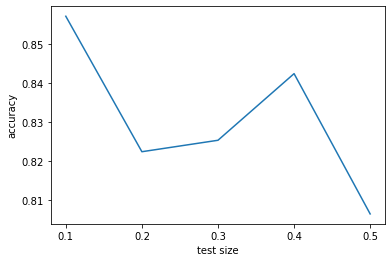

In [15]:
r2=[]
k=[0.1,0.2,0.3,0.4,0.5]

for i in k:
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=i,random_state=5)
    model = Sequential()

    model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(64, (3, 3), activation='relu')) 
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu')) 
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())

    model.add(Dropout(0.4))

    model.add(Dense(128, activation='relu'))

    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=50, batch_size=12, verbose=2, 
             validation_data=(x_test, y_test))
    loss, accuracy = model.evaluate(x_test, y_test)
    r2.append(accuracy)
    
plt.plot(k,r2)
plt.xticks(k)
plt.xlabel("test size")
plt.ylabel("accuracy")

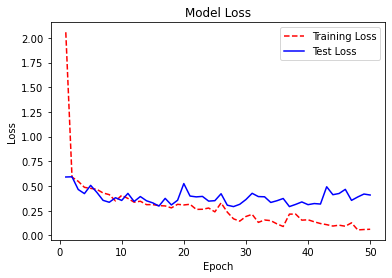

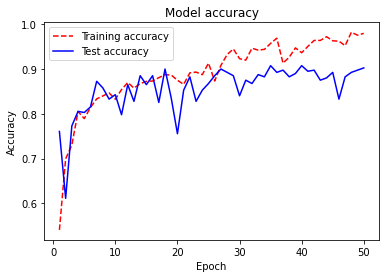

In [16]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
epoch_count = range(1, len(training_acc) + 1
                   )
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Test accuracy'])
plt.show()